In [82]:
import math
import matplotlib.pyplot as plt 
import missingno as msno
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from statsmodels.stats.diagnostic import normal_ad, kstest_fit, het_breuschpagan, het_white
# analyses de régression et des tests de diagnostics statistiques

from functions import *

<span style="font-size:24px; font-weight:bold;">1 - Import des données & vérifications</span>

In [83]:
# Import data
billets = pd.read_csv('billets.csv', sep=';', encoding='latin_1')
billets.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

```html
La variable **is_genuine** est booléenne, les 6 autres variables sont quantitatives continues.
Les billets ne sont pas identifiés par un numéro de série ou autre identifiant ; au besoin, on pourra utiliser leur index dans le DataFrame comme clé primaire artificielle.
```

In [84]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


Les differentes variables apparaissent correctement typees.

In [85]:
billets.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

Margin_low comprend des valeurs en moins.  
Les valeurs minimum et maximum sont relativement proches des moyennes.  
L'ecart type est comprit entre 0 et 1 ce qui est faible donc homogènes.  
=> Les données sont pertinents

<Axes: >

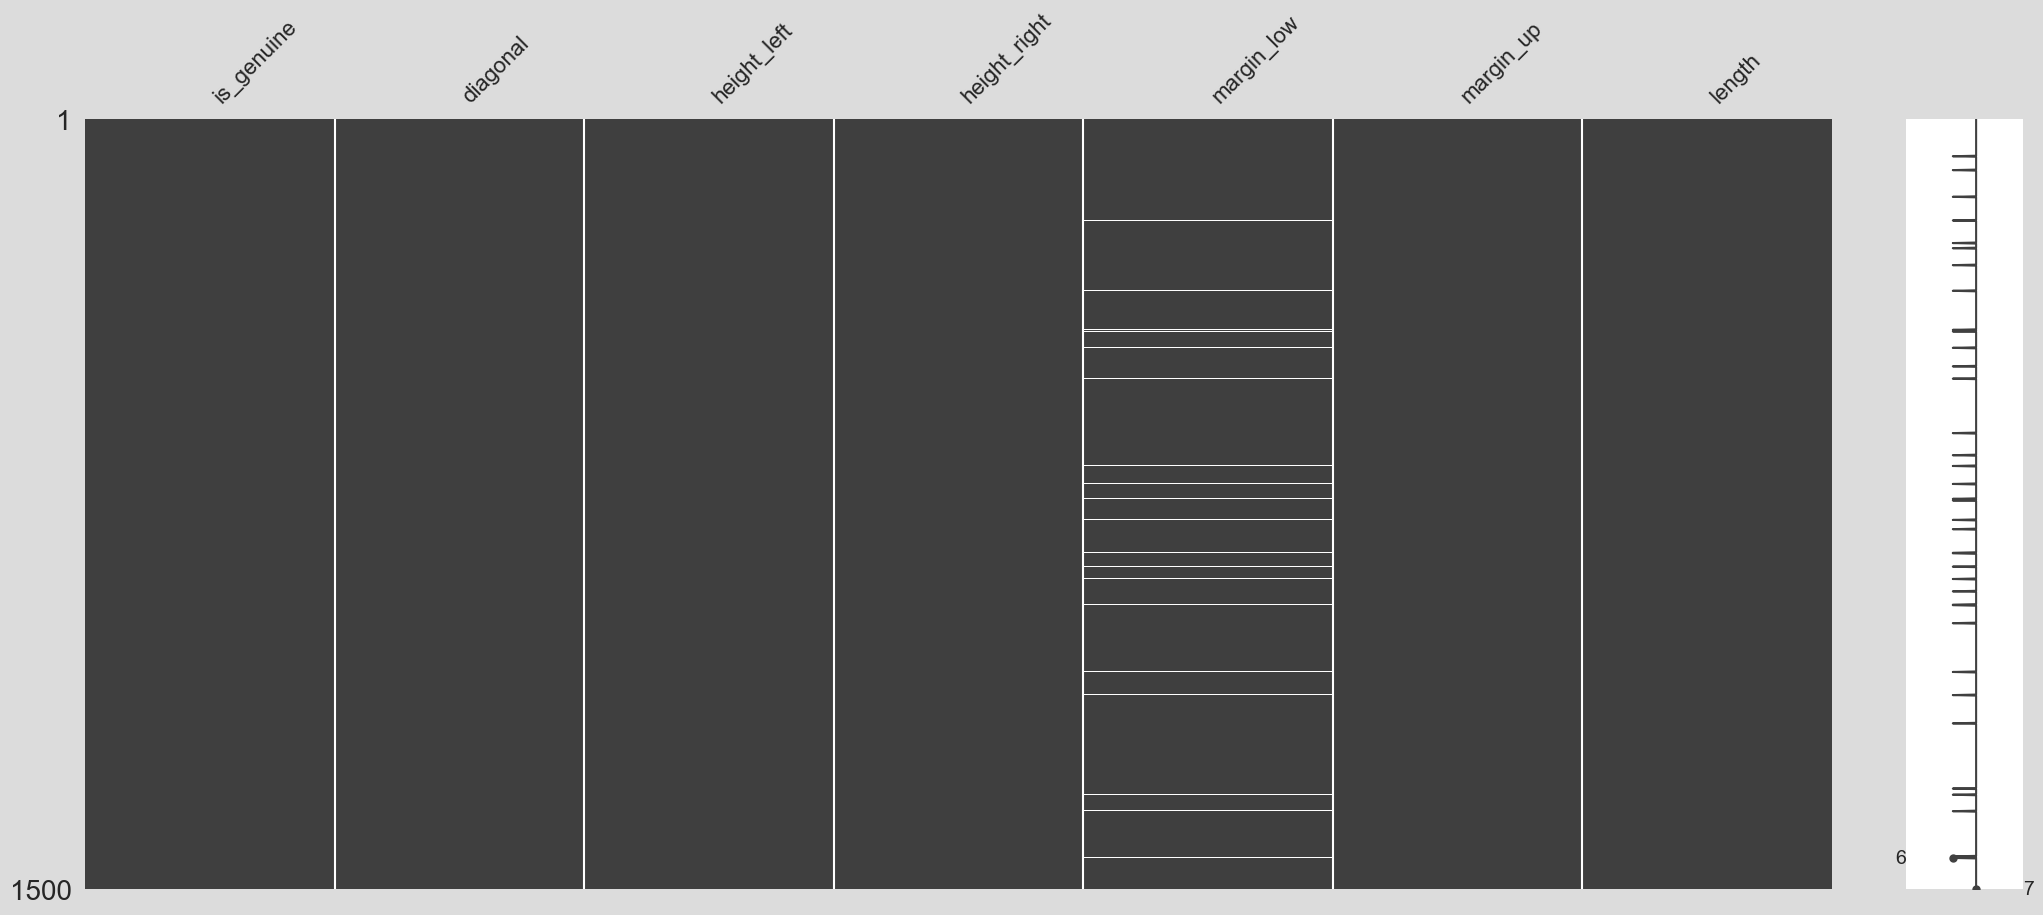

In [86]:
msno.matrix(billets)

In [87]:
# identifier ligne des datas manquantes 
missing_data = billets.loc[billets['margin_low'].isna() == True]
missing_data.head(missing_data.shape[0])

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True    171.94       103.89        103.45         NaN       3.25   
99          True    171.93       104.07        104.18         NaN       3.14   
151         True    172.07       103.80        104.38         NaN       3.02   
197         True    171.45       103.66        103.80         NaN       3.62   
241         True    171.83       104.14        104.06         NaN       3.02   
251         True    171.80       103.26        102.82         NaN       2.95   
284         True    171.92       103.83        103.76         NaN       3.23   
334         True    171.85       103.70        103.96         NaN       3.00   
410         True    172.56       103.72        103.51         NaN       3.12   
413         True    172.30       103.66        103.50         NaN       3.16   
445         True    172.34       104.42        103.22         NaN       3.01   
481         True    171.81       103.53        103.96         NaN       2.71   
505         True    172.01       103.97        104.05         NaN       2.98   
611         True    171.80       103.68        103.49         NaN       3.30   
654         True    171.97       103.69        103.54         NaN       2.70   
675         True    171.60       103.85        103.91         NaN       2.56   
710         True    172.03       103.97        103.86         NaN       3.07   
739         True    172.07       103.74        103.76         NaN       3.09   
742         True    172.14       104.06        103.96         NaN       3.24   
780         True    172.41       103.95        103.79         NaN       3.13   
798         True    171.96       103.84        103.62         NaN       3.01   
844         True    171.62       104.14        104.49         NaN       2.99   
845         True    172.02       104.21        104.05         NaN       2.90   
871         True    171.37       104.07        103.75         NaN       3.07   
895         True    171.81       103.68        103.80         NaN       2.98   
919         True    171.92       103.68        103.45         NaN       2.58   
945         True    172.09       103.74        103.52         NaN       3.02   
946         True    171.63       103.87        104.66         NaN       3.27   
981         True    172.02       104.23        103.72         NaN       2.99   
1076       False    171.57       104.27        104.44         NaN       3.21   
1121       False    171.40       104.38        104.19         NaN       3.17   
1176       False    171.59       104.05        103.94         NaN       3.02   
1303       False    172.17       104.49        103.76         NaN       2.93   
1315       False    172.08       104.15        104.17         NaN       3.40   
1347       False    171.72       104.46        104.12         NaN       3.61   
1435       False    172.66       104.33        104.41         NaN       3.56   
1438       False    171.90       104.28        104.29         NaN       3.24   

      length  
72    112.79  
99    113.08  
151   112.93  
197   113.27  
241   112.36  
251   113.22  
284   113.29  
334   113.36  
410   112.95  
413   112.95  
445   112.97  
481   113.99  
505   113.65  
611   112.84  
654   112.79  
675   113.27  
710   112.65  
739   112.41  
742   113.07  
780   113.41  
798   114.44  
844   113.35  
845   113.62  
871   113.27  
895   113.82  
919   113.68  
945   112.78  
946   112.68  
981   113.37  
1076  111.87  
1121  112.39  
1176  111.29  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49

In [88]:
missing_data['is_genuine'].value_counts()

is_genuine
True     29
False     8
Name: count, dtype: int64

La colonne margin_low comporte 37 valeurs manquantes (pour 29 vrais et 8 faux billets) qu'il faudra completer.

In [89]:
billets.duplicated().sum()

0

Le fichier ne comporte pas de ligne dupliquées. 

<span style="font-size:24px; font-weight:bold;">2 - Regression linéaire multiple</span>

<span style="font-size:16px; font-weight:bold;">2.1) Carateristiques du modèle</span>

In [90]:
# create dataframe without missing data
billets_trim = billets.loc[billets['margin_low'].isna() == False]
# perform linear regression to complete margin_low column
y_reglin = billets_trim['margin_low']
# variable dépendante margin_low que l'on souhaite prédire.
x_reglin = billets_trim[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
# variables explicatives / prédicteur our la régression linéaire contient les colonnes diagonal, margin_up, etc...
x_reglin = sm.add_constant(x_reglin, prepend=True, has_constant='skip')
# ajoute une constante nécessaire pour inclure un terme constant dans la régression -> ordonnée a l'origine 
reg_multi_reglin = sm.OLS(endog=y_reglin, exog=x_reglin).fit()
# modèle de régression linéaire est créé 
print(reg_multi_reglin.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          2.60e-202
Time:                        12:54:34   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.9948      9.656      2.382   

Chaque variable a un effet statistiquement significatif sur margin_low car la p-values sont inférieures à 5%. Une p-value très proche de zéro pour la F-statistic signifie qu’on peut rejeter cette hypothèse : il est très probable que le modèle dans son ensemble explique la variation de margin_low, ce qui rend le modèle significatif.  
Cependant R2 et le R2 ajusté sont faibles (< 0.5), ce qui indique le modèle ne prédit pas margin_low avec précision.   
Le Condition Number est extrêmement élevé (>30) indique une très forte colinéarité entre les variables explicatives du modèle ce qui peut entraîner des problèmes significatifs. Les coefficients peuvent devenir instables et leurs interprétations peuvent être trompeuses. On va donc verifier dans quelle mesure les variables explicatives sont corrélée entre elle . 

<span style="font-size:16px; font-weight:bold;">2.2) Colinéarité</span>

In [91]:
# calculate Variance Inflation Factor each variable
vif_reglin = pd.DataFrame()
variables_reglin = reg_multi_reglin.model.exog
vif_reglin["variable"] = ['diagonal', 'height_left', 'height_right', 'margin_up', 'length']
vif_reglin["vi_factor"] = [variance_inflation_factor(variables_reglin, i) for i in np.arange(1, variables_reglin.shape[1])]
vif_reglin.to_csv('vif_reglin.csv', index=False, encoding='latin_1')
vif_reglin

variable  vi_factor
0      diagonal   1.013613
1   height_left   1.138261
2  height_right   1.230115
3     margin_up   1.404404
4        length   1.576950

Toutes les valeurs du VIF sont inférieures à 5, cela indique qu'il n'y a pas de colinéarité significative entre les variables explicatives. En d’autres termes, les variables explicatives sont faiblement corrélées entre elles, donc le problème de faible capacité prédictive de votre modèle (faible R²) n'est pas lié à la colinéarité des variables.

<span style="font-size:16px; font-weight:bold;">2.3) Regression</span>

In [92]:
billets_trim_reg = billets_trim.copy()
billets_trim_reg['margin_low_reglin'] = reg_multi_reglin.predict()
# Effectue des prédictions avec le modèle de régression linéaire pour obtenir les valeurs prédites
billets_trim_reg['residus_reglin'] = reg_multi_reglin.resid
# Les résidus sont la différence entre les valeurs réelles et les valeurs prédites
billets_trim_reg.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  margin_low_reglin  residus_reglin  
0  112.83           4.788676       -0.268676  
1  113.09           4.138908       -0.368908  
2  113.16           4.125933        0.274067  
3  113.51           4.156580       -0.536580  
4  112.54           4.577425       -0.537425

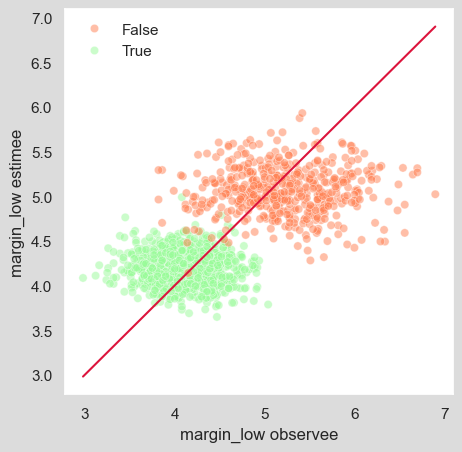

In [93]:
# plot adjusted values against observed values
sns.set(rc={'figure.figsize':(5,5),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
X_plot = [billets_trim_reg['margin_low'].min(), billets_trim_reg['margin_low'].max()]

ax = sns.scatterplot(x="margin_low", y="margin_low_reglin", data=billets_trim_reg, hue='is_genuine', alpha=0.5,
                     palette=['coral','palegreen'])
ax.set(xlabel='margin_low observee', ylabel='margin_low estimee')
plt.plot(X_plot, X_plot, color='crimson')
plt.legend(title='', frameon=False)
plt.savefig('margin_low_e_reglin.png')
plt.show()

Droite rouge (y = x) : Cette droite représente l'égalité parfaite entre les valeurs observées (margin_low) et prédites (margin_low_reglin). Plus la regression est parfaite, plus les valeurs ajustees et observees seront égales (residus nuls) et tous les points seront alignes sur la premiere bissectrice d'equation y=x. 
On note une dispersion apparemment plus grande des faux billets autour de la premiere bissectrice, indiquant des residus plus grands pour ces billets.

In [94]:
# scatterplot residues
sns.set(rc={'figure.figsize':(5,3),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
ax = sns.scatterplot(x=billets_trim_reg.index, y=billets_trim_reg['residus_reglin'],
                     data=billets_trim_reg, hue='is_genuine', palette=['coral', 'palegreen'], alpha=0.5)
ax.set(xlabel='billet', ylabel='residu')
plt.legend(title='', frameon=False)
plt.axhline(0, color='crimson')
plt.savefig('scatter_residus_reglin.png')
plt.show()

On observe que les résidus des faux billets sont plus importants (plus éloignés de 0) cela pourrait indiquer que le modèle fait des erreurs plus grandes pour prédire les faux billets.

In [95]:
billets_trim_reg['residus_reglin'].mean()

-7.547391738695801e-15

La moyenne des résidus est proche de zéro, ce qui signifie que le modèle de régression linéaire <span style="font-size: 14px; font-weight: bold;">n'a pas de biais systématique.</span>
>
>


<span style="font-size:16px; font-weight:bold;">2.4) Hétéroscédasticité </span>

In [96]:
# Breusch-Pagan test
lm_bp, lm_pval_bp, f_val_bp, f_pval_bp = het_breuschpagan(reg_multi_reglin.resid, variables_reglin)
print('Lagrange multiplier statistic:', lm_bp)
print('p-value Lagrange multiplier statistic:', lm_pval_bp)

Lagrange multiplier statistic: 80.1626128017556
p-value Lagrange multiplier statistic: 7.759535216176066e-16


On cherche à voir ici si les residu du modèle sont dans un cas hétéroscédasticité, situation où la variance des erreurs (ou des résidus) n'est pas constante à travers les différentes valeurs des variables explicatives. En d'autres termes, l'erreur de prédiction ne reste pas stable pour toutes les observations du modèle — elle varie en fonction de certaines caractéristiques du modèle. La p-valeur de la statistique de test du multiplicateur de Lagrange est inferieure à 5%, on rejette l'hypothese H0 du test de Breusch-Pagan selon laquelle les variances des residus sont constantes, nous avons suffisamment d'information pour conclure à l'hétéroscédasticité des residus.

In [97]:
# White test
lm_w, lm_pval_w, f_val_w, f_pval_w = het_white(reg_multi_reglin.resid, variables_reglin)
print('Lagrange multiplier statistic:', lm_w)
print('p-value Lagrange multiplier statistic:', lm_pval_w)

Lagrange multiplier statistic: 109.86015196906617
p-value Lagrange multiplier statistic: 2.0828244986259774e-14


Le test de White est souvent préféré lorsqu'on veut un test plus général qui ne repose pas sur des hypothèses spécifiques concernant la relation entre les résidus et les variables explicatives, contrairement au test de Breusch-Pagan.  
Là aussi la p-valeur de la statistique de test du multiplicateur de Lagrange est inferieure à 5%, on rejette l'hypothese H0 du test de White selon laquelle les variances des residus sont constantes, nous avons suffisamment d'information pour <span style="font-size: 14px; font-weight: bold;"> conclure à l'hétéroscédasticité des residus </span>

<span style="font-size:16px; font-weight:bold;">2.5) Loi normal </span>

In [98]:
st.shapiro(reg_multi_reglin.resid)

ShapiroResult(statistic=0.9857882577573774, pvalue=8.540407842385447e-11)

Test de Shapiro-Wilk, un test statistique utilisé pour vérifier la normalité des résidus (ou des données en général).  
La p-value du test de Shapiro-Wilk est inférieure à 5%, ce qui signifie que nous rejetons l'hypothèse nulle Ho, selon laquelle les résidus suivent une distribution normale. En d'autres termes, les résidus ne sont pas normalement distribués.  
Cependant, il est important de noter que même si les résidus ne sont pas normalement distribués, la moyenne proche de zéro et la taille suffisante de l'échantillon suggèrent que les résultats obtenus par le modèle linéaire ne sont pas absurdes 

In [99]:
n = billets_trim_reg.shape[0]
print("Nombre d'observations:", n)

# calculate first quartile
Q1 = np.percentile(billets_trim_reg['residus_reglin'], 25)
print("Premier quartile:", Q1)

# calculate third quartile
Q3 = np.percentile(billets_trim_reg['residus_reglin'], 75)
print("Troisieme quartile:", Q3)

# calculate interquartile range
IQ = Q3 - Q1
print("Interquartile range:", IQ)

# calculate bin width for histogram (Freedman-Diaconis rule)
bin_width = 2*((IQ)/np.cbrt(n))
print("Largeur des bins:", bin_width)

# calculate number of bins for histogram
maxi = billets_trim_reg['residus_reglin'].max()
mini = billets_trim_reg['residus_reglin'].min()
nb_bins = ((maxi - mini) / bin_width).astype(int)
print("Nombre de bins:", nb_bins)

Nombre d'observations: 1463
Premier quartile: -0.3170737908560679
Troisieme quartile: 0.27352896965695717
Interquartile range: 0.5906027605130251
Largeur des bins: 0.10405046518377298
Nombre de bins: 33


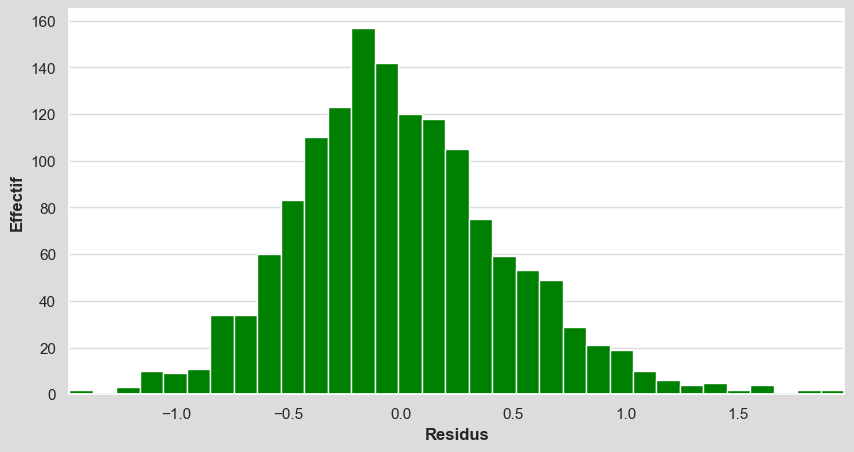

In [100]:
# analyse residues with histogram
sns.set(rc={'figure.figsize':(10, 5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph3 = plt.hist(billets_trim_reg['residus_reglin'], bins=nb_bins, color='green')
plt.xlim([mini, maxi])
plt.xlabel('Residus', fontweight='bold', fontsize='12')
plt.ylabel('Effectif', fontweight='bold', fontsize='12')
plt.grid(axis='y', color='gainsboro')
plt.savefig("hist_reglin.png", bbox_inches='tight')

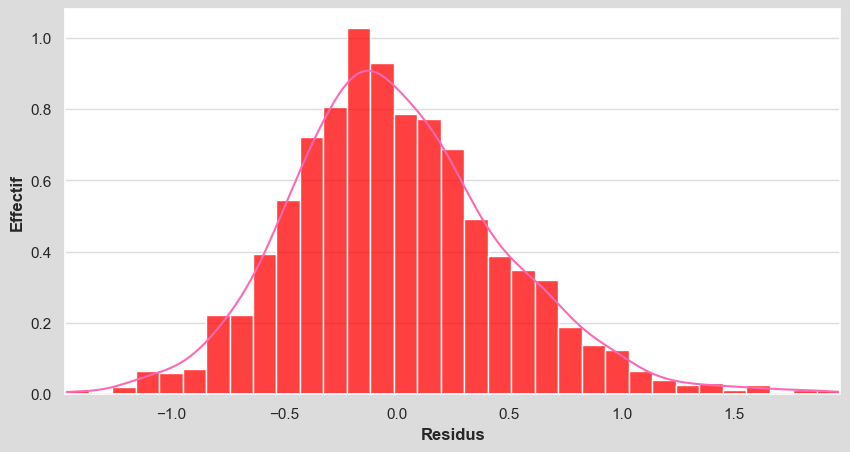

In [101]:
sns.set(rc={'figure.figsize':(10, 5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph3b = sns.histplot(billets_trim_reg['residus_reglin'], bins=nb_bins, kde=False, color='red', stat='density')
sns.kdeplot(data=billets_trim_reg, x='residus_reglin', color='hotpink')
plt.xlim([mini, maxi])
plt.xlabel('Residus', fontweight='bold', fontsize='12')
plt.ylabel('Effectif', fontweight='bold', fontsize='12')
plt.grid(axis='y', color='gainsboro')
plt.savefig("histplot_kde_reglin.png", bbox_inches='tight')

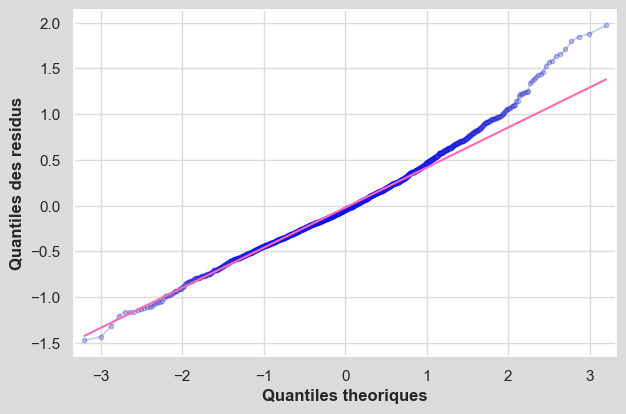

In [102]:
# analyse residues with a QQ plot
fig, ax = plt.subplots(1, figsize=(7, 4.5))
graph4 = sm.qqplot(billets_trim_reg['residus_reglin'], marker='.', markerfacecolor='grey',
                   markeredgecolor='blue', alpha=0.3, line="q", linestyle='solid', ax=ax)
plt.xlabel("Quantiles theoriques", fontweight='bold', fontsize=12)
plt.ylabel("Quantiles des residus", fontweight='bold', fontsize=12)
ax.get_lines()[1].set_color("hotpink")
plt.grid(axis='both', color='gainsboro')
plt.savefig("qq_reglin.png", bbox_inches='tight')
plt.show()

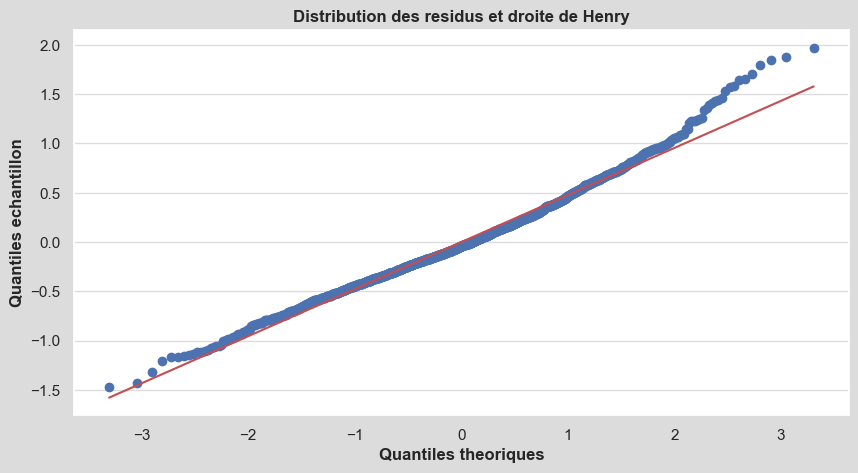

In [103]:
# droite de Henry
fig, ax = plt.subplots()
graph5 = st.probplot(billets_trim_reg['residus_reglin'], dist="norm", plot=ax)
ax.set_title("Distribution des residus et droite de Henry", fontname='Arial', fontsize=12, fontweight='bold')
plt.xlabel('Quantiles theoriques', fontweight='bold', fontsize='12')
plt.ylabel('Quantiles echantillon', fontweight='bold', fontsize='12')
plt.grid(axis='y', color='gainsboro')
plt.savefig("henry_reglin.png", bbox_inches='tight')
plt.show()

Données centrales alignées avec la droite : Si les points proches du centre du graphique suivent bien la droite théorique (la droite rouge), cela signifie que les résidus dans la partie centrale de la distribution se rapprochent d'une distribution normale. Cela indique une bonne approximation des valeurs des résidus pour les valeurs proches de la moyenne du modèle.

Décalage des queues à droite : le décollement des queues des résidus à droite montre une déviation par rapport à la normale. Cela signifie que pour les valeurs extrêmes (les résidus très grands ou très petits), la distribution des résidus est différente de la normale. En d'autres termes, vous avez  <span style="font-size: 14px; font-weight: bold;"> peut-être des valeurs aberrantes ou des "outliers" qui ne suivent pas la même distribution que les valeurs proches de la moyenne. </span>

In [104]:
billets_trim_reg.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  margin_low_reglin  residus_reglin  
0  112.83           4.788676       -0.268676  
1  113.09           4.138908       -0.368908  
2  113.16           4.125933        0.274067  
3  113.51           4.156580       -0.536580  
4  112.54           4.577425       -0.537425

<span style="font-size:16px; font-weight:bold;">2.6) Regression sans valeurs aberrantes </span>

In [105]:
# create data
stud_res = reg_multi_reglin.get_influence().resid_studentized_external  # calculate studentized residues
dist_cook, pval_cook = reg_multi_reglin.get_influence().cooks_distance  # calculate Cook distance
dffits, pval_dffits = reg_multi_reglin.get_influence().dffits  # calculate influence of observations
lvg = reg_multi_reglin.get_influence().hat_matrix_diag  # diagonal of the hat matrix for ordinary least squares method

# store data in dataframe
billets_trim_reg_2 = pd.concat([billets_trim_reg[['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
                               'margin_up', 'length', 'margin_low_reglin', 'residus_reglin']],
                                reg_multi_reglin.get_influence().summary_frame()], axis=1)
billets_trim_reg_2.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  margin_low_reglin  residus_reglin  dfb_const  ...  dfb_height_left  \
0  112.83           4.788676       -0.268676   0.038028  ...        -0.040676   
1  113.09           4.138908       -0.368908  -0.047734  ...         0.040802   
2  113.16           4.125933        0.274067  -0.028752  ...         0.027975   
3  113.51           4.156580       -0.536580  -0.031981  ...         0.001406   
4  112.54           4.577425       -0.537425  -0.025618  ...        -0.027128   

   dfb_height_right  dfb_margin_up  dfb_length   cooks_d  standard_resid  \
0         -0.050650       0.028339   -0.018016  0.000894       -0.563593   
1          0.006819       0.006051    0.006096  0.000597       -0.769710   
2         -0.020340      -0.010975   -0.001295  0.000457        0.572488   
3         -0.016400       0.006425   -0.029579  0.000936       -1.118681   
4          0.056039      -0.049448   -0.009670  0.001171       -1.121058   

   hat_diag  dffits_internal  student_resid    dffits  
0  0.016606        -0.073239      -0.563461 -0.073221  
1  0.006015        -0.059874      -0.769603 -0.059866  
2  0.008298         0.052367       0.572356  0.052355  
3  0.004467        -0.074934      -1.118778 -0.074940  
4  0.005558        -0.083813      -1.121157 -0.083821  

[5 rows x 21 columns]

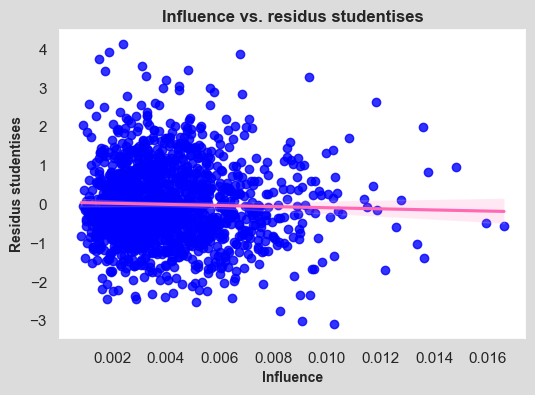

In [106]:
# plot influence vs studentised residues
sns.set(rc={'figure.figsize':(6, 4), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph5 = sns.regplot(x='hat_diag', y='student_resid', data=billets_trim_reg_2, scatter_kws={"color":'blue'},
                     line_kws={"color":"hotpink"})
plt.xlabel('Influence', fontweight='bold', fontsize=10)
plt.ylabel('Residus studentises', fontweight='bold', fontsize=10)
plt.title('Influence vs. residus studentises', fontweight='bold', fontsize=12)
plt.savefig('stud_res_influence.png')
plt.show()

In [107]:
# overview of Studentised residues
print ("Residus studentises\n", billets_trim_reg_2['student_resid'].describe())

Residus studentises
 count    1463.000000
mean        0.000133
std         1.001419
min        -3.087577
25%        -0.660578
50%        -0.086814
75%         0.570403
max         4.127099
Name: student_resid, dtype: float64


In [108]:
# identification of outliers
outliers = billets_trim_reg_2.loc[abs(billets_trim_reg_2['student_resid']) > 2]

# check if outliers influence is above threshold using leverage cutoff
# threshold = (2k+2)/n where k is the number of variables and n is the number of observations
threshold = ((2 * (len(x_reglin.columns) - 1) + 2) / billets_trim_reg_2.shape[0])
influents_2 = billets_trim_reg_2.loc[billets_trim_reg_2['hat_diag'] > threshold]

# cross outliers and influent banknotes
influent_outliers_2 =pd.merge(outliers, influents_2, left_index=True, right_index=True)

In [109]:
print("Il y a", outliers.shape[0], "billets atypiques dans le dataset.")
print("Il y a", influents_2.shape[0], "billets influents dans le dataset.")
print("Il y a", influent_outliers_2.shape[0], "billets atypiques et influents dans le dataset.")

Il y a 72 billets atypiques dans le dataset.
Il y a 75 billets influents dans le dataset.
Il y a 7 billets atypiques et influents dans le dataset.


In [110]:
billets_trim_3 = billets_trim.drop(influent_outliers_2.index)
billets_trim_3.shape

(1456, 7)

In [111]:
# perform linear regression to complete margin_low column
y_reglin_2 = billets_trim_3['margin_low']
x_reglin_2 = billets_trim_3[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
x_reglin_2 = sm.add_constant(x_reglin_2, prepend=True, has_constant='skip')
reg_multi_reglin_2 = sm.OLS(endog=y_reglin_2, exog=x_reglin_2).fit()
print(reg_multi_reglin_2.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     282.2
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          5.39e-211
Time:                        12:54:42   Log-Likelihood:                -972.21
No. Observations:                1456   AIC:                             1956.
Df Residuals:                    1450   BIC:                             1988.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           24.2866      9.516      2.552   

In [112]:
# calculate residues
margin_low_ai = reg_multi_reglin_2.predict(x_reglin_2)
billets_trim_3['margin_low_ai'] = margin_low_ai
billets_trim_3['residus_ai'] = billets_trim_3['margin_low_ai'] - billets_trim_3['margin_low']
billets_trim_3.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  margin_low_ai  residus_ai  
0  112.83       4.794173    0.274173  
1  113.09       4.133400    0.363400  
2  113.16       4.122230   -0.277770  
3  113.51       4.155756    0.535756  
4  112.54       4.593061    0.553061

In [113]:
# mean residue
billets_trim_3['residus_ai'].mean()

-9.923685804726399e-14

In [114]:
# Breusch-Pagan test for homoscedasticity
lm_bp_ai, lm_pval_bp_ai, f_val_bp_ai, f_pval_bp_ai = het_breuschpagan(billets_trim_3['residus_ai'], x_reglin_2)
print('Lagrange multiplier statistic:', lm_bp_ai)
print('p-value Lagrange multiplier statistic:', lm_pval_bp_ai)

Lagrange multiplier statistic: 74.98436229042923
p-value Lagrange multiplier statistic: 9.373120233301012e-15


La p-valeur de la statistique de test du multiplicateur de Lagrange est inferieure à 5%, on rejette l'hypothese H0 du test de Breusch-Pagan selon laquelle les variances des residus sont constantes, nous avons suffisamment d'information pour conclure a l'heteroscedasticite des residus.

In [115]:
# Shapiro test for normality
st.shapiro(billets_trim_3['residus_ai'])

ShapiroResult(statistic=0.9853682593487144, pvalue=5.720615531251956e-11)

La p-value est inferieure a 5%, donc on rejette H0, les residus ne sont pas normaux, mais leur observation, le fait que leur moyenne soit tres proche de zero et que l'echantillon soit de taille suffisante (superieure a 30) permettent de dire que les resultats obtenus apres elimination des valeurs atypiques et influentes ne sont pas absurdes, meme si les residus ne sont pas normaux. Cependant, ils ne permettent pas d'ameliorer significativment les resultats de la regression lineaire multiple.

<span style="font-size: 14px; font-weight: bold;"> Le R2 varie peu apres elimination des valeurs atypiques et influentes (0.493 contre 0.477) et les coefficients de regression varient peu. Les residus ne sont toujorus ni Gaussiens, ni homoscedastiques. En outre, le nombre de billets atypiques et influents est faible (7 sur 1463) et on peut donc en conclure que leur influence sur les resultats de la regression lineaire est suffisemment faible pour que leur elimination ne constitue pas une amelioration significative du modele, ce qui valide statistiquement notre intuition initiale de les conserver dans l'analyse. </span>

<span style="font-size:24px; font-weight:bold;">3) Imputation & analyse des données </span>

In [116]:
# add column of 1s
billets = sm.add_constant(billets, prepend=True, has_constant='skip')

# fill in missing margin_low values with regression prediction
billets.loc[(billets['margin_low'].isna() == True), 'margin_low'] = reg_multi_reglin.predict(billets[['const','diagonal',
                                                                                                      'height_left',
                                                                                                      'height_right',
                                                                                                      'margin_up', 'length']])
# remove column of 1s
billets_final = billets.drop('const', axis=1)
billets_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [117]:
# display basic statistics
billets_final.describe(include='all')

is_genuine     diagonal  height_left  height_right   margin_low  \
count        1500  1500.000000  1500.000000   1500.000000  1500.000000   
unique          2          NaN          NaN           NaN          NaN   
top          True          NaN          NaN           NaN          NaN   
freq         1000          NaN          NaN           NaN          NaN   
mean          NaN   171.958440   104.029533    103.920307     4.483475   
std           NaN     0.305195     0.299462      0.325627     0.659632   
min           NaN   171.040000   103.140000    102.820000     2.980000   
25%           NaN   171.750000   103.820000    103.710000     4.020000   
50%           NaN   171.960000   104.040000    103.920000     4.310000   
75%           NaN   172.170000   104.230000    104.150000     4.870000   
max           NaN   173.010000   104.880000    104.950000     6.900000   

          margin_up      length  
count   1500.000000  1500.00000  
unique          NaN         NaN  
top             NaN         NaN  
freq            NaN         NaN  
mean       3.151473   112.67850  
std        0.231813     0.87273  
min        2.270000   109.49000  
25%        2.990000   112.03000  
50%        3.140000   112.96000  
75%        3.310000   113.34000  
max        3.910000   114.44000

In [118]:
# re-check for duplicates
dup_final = billets_final.duplicated().value_counts()
dup_final

False    1500
Name: count, dtype: int64

<Axes: >

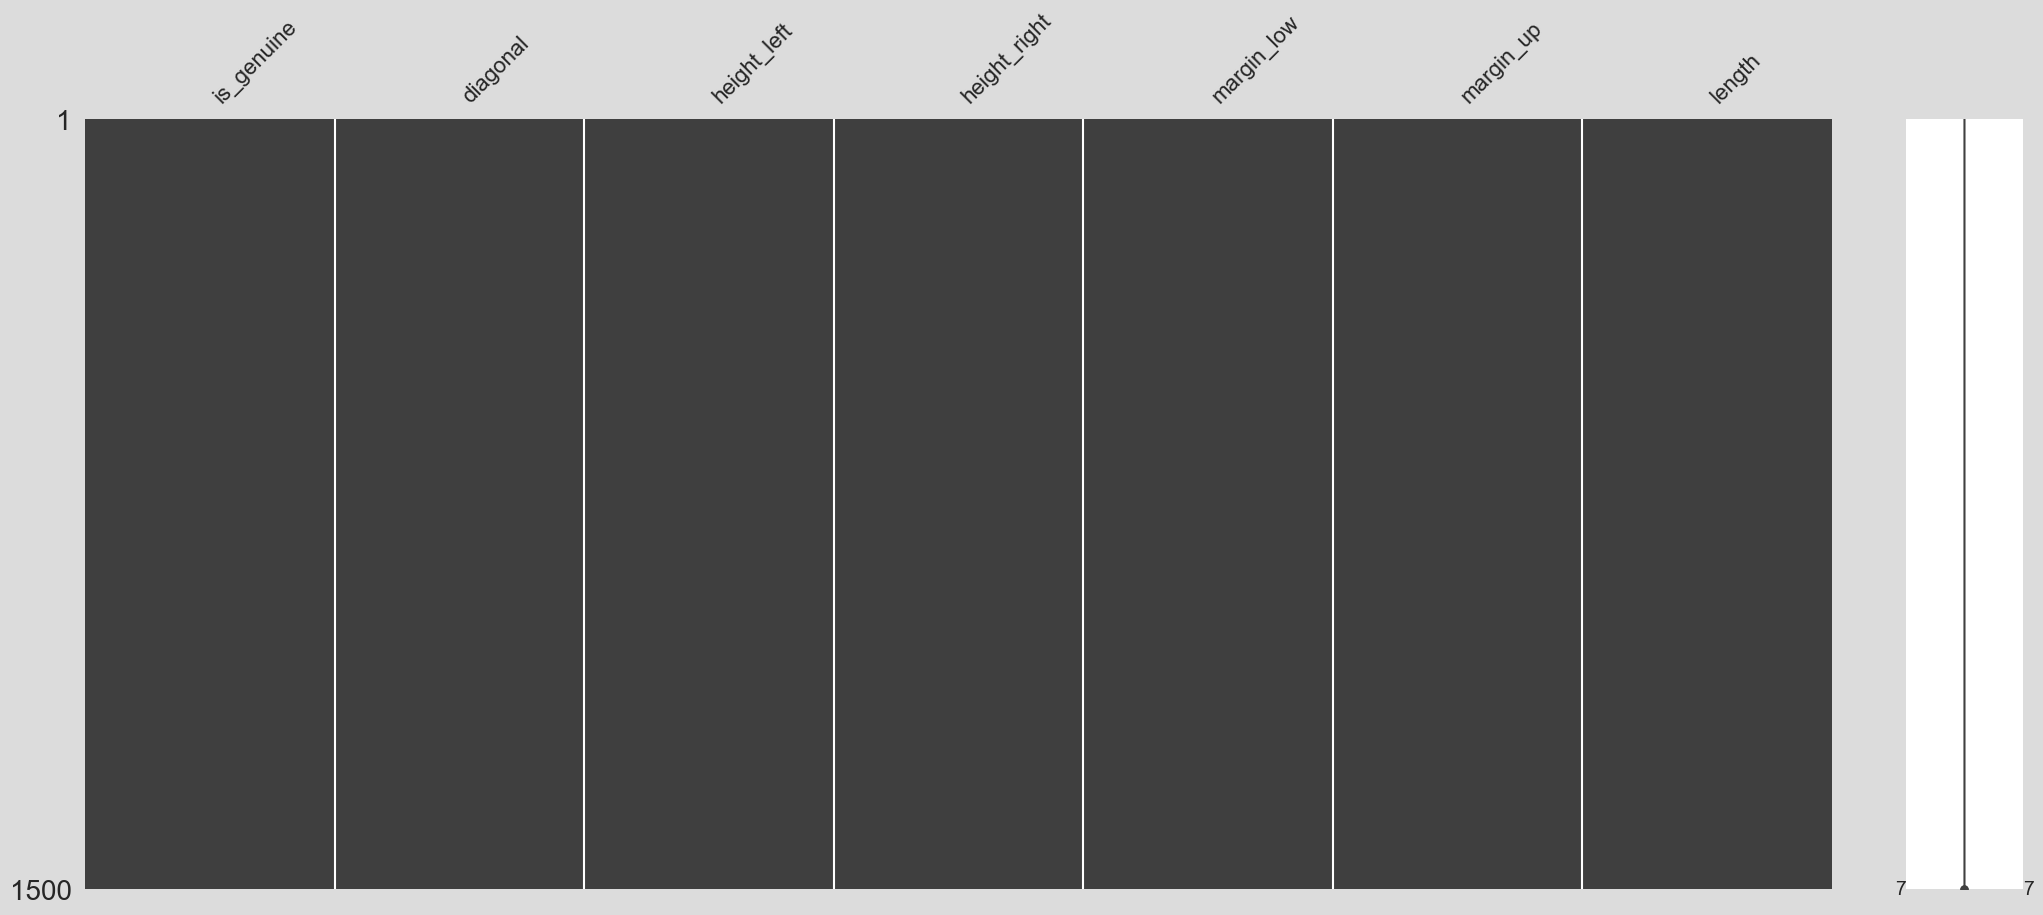

In [119]:
# re-check for missing values
msno.matrix(billets_final)

In [120]:
billets_final.to_csv('billets_final.csv', index=False, encoding='latin_1')

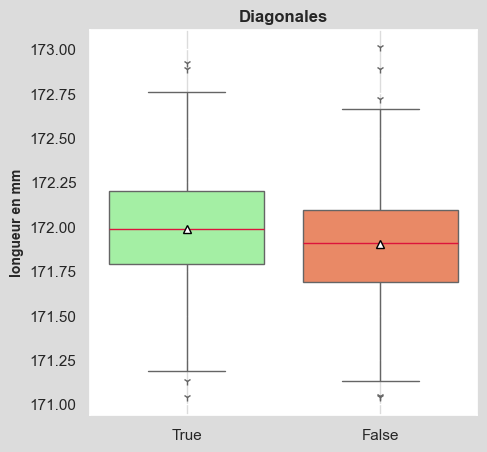

In [121]:
# analyse diagonals with a box plot
sns.set(rc={'figure.figsize':(5, 5),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph1_diag = sns.boxplot(data=billets_final, y='diagonal', x='is_genuine', hue='is_genuine',
                     flierprops={"marker":"1"}, medianprops={"color":'crimson'},
                     meanprops={"markerfacecolor":"white", "markeredgecolor":'black'},
                     orient="v", palette=['coral', 'palegreen'], showmeans=True, dodge=False, order=[True, False])
plt.xlabel('')
plt.ylabel("longueur en mm", fontweight='bold', fontsize=10)
plt.title("Diagonales", fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='x', color='gainsboro')
plt.savefig("boxplot_diagonal.png", bbox_inches='tight')
plt.show()

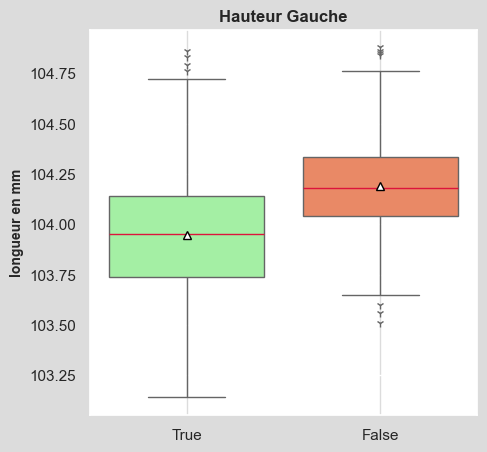

In [122]:
# analyse height_left with a box plot
sns.set(rc={'figure.figsize':(5, 5),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph1_hl = sns.boxplot(data=billets_final, y='height_left', x='is_genuine', hue='is_genuine',
                     flierprops={"marker":"1"}, medianprops={"color":'crimson'},
                     meanprops={"markerfacecolor":"white", "markeredgecolor":'black'},
                     orient="v", palette=['coral', 'palegreen'], showmeans=True, dodge=False, order=[True, False])
plt.xlabel('')
plt.ylabel("longueur en mm", fontweight='bold', fontsize=10)
plt.title("Hauteur Gauche", fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='x', color='gainsboro')
plt.savefig("boxplot_height_left.png", bbox_inches='tight')
plt.show()

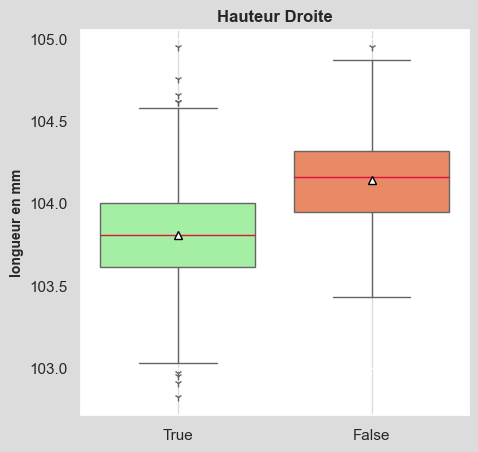

In [123]:
# analyse height_right with a box plot
sns.set(rc={'figure.figsize':(5, 5),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph1_hr = sns.boxplot(data=billets_final, y='height_right', x='is_genuine', hue='is_genuine',
                     flierprops={"marker": "1"}, medianprops={"color" : 'crimson'},
                     meanprops={"markerfacecolor":"white", "markeredgecolor":'black'},
                     orient="v", palette=['coral', 'palegreen'], showmeans=True, dodge=False, order=[True, False])
plt.xlabel('')
plt.ylabel("longueur en mm", fontweight='bold', fontsize=10)
plt.title("Hauteur Droite", fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='x', color='gainsboro')
plt.savefig("boxplot_height_right.png", bbox_inches='tight')
plt.show()

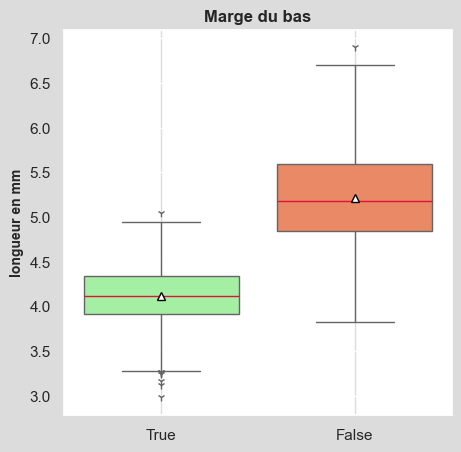

In [124]:
# analyse margin_low with a box plot
sns.set(rc={'figure.figsize':(5, 5),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph1_ml = sns.boxplot(data=billets_final, y='margin_low', x='is_genuine', hue='is_genuine',
                     flierprops={"marker":"1"}, medianprops={"color":'crimson'},
                     meanprops={"markerfacecolor":"white", "markeredgecolor":'black'},
                     orient="v", palette=['coral', 'palegreen'], showmeans=True, dodge=False, order=[True, False])
plt.xlabel('')
plt.ylabel("longueur en mm", fontweight='bold', fontsize=10)
plt.title("Marge du bas", fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='x', color='gainsboro')
plt.savefig("boxplot_margin_low.png", bbox_inches='tight')
plt.show()

In [125]:
# analyse margin_up with a box plot
sns.set(rc={'figure.figsize':(5, 5),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph1_mu = sns.boxplot(data=billets_final, y='margin_up', x='is_genuine', hue='is_genuine',
                     flierprops={"marker":"1"}, medianprops={"color":'crimson'},
                     meanprops={"markerfacecolor":"white", "markeredgecolor":'black'},
                     orient="v", palette=['coral', 'palegreen'], showmeans=True, dodge=False, order=[True, False])
plt.xlabel('')
plt.ylabel("longueur en mm", fontweight='bold', fontsize=10)
plt.title("Marge du Haut", fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='x', color='gainsboro')
plt.savefig("boxplot_margin_up.png", bbox_inches='tight')
plt.show()

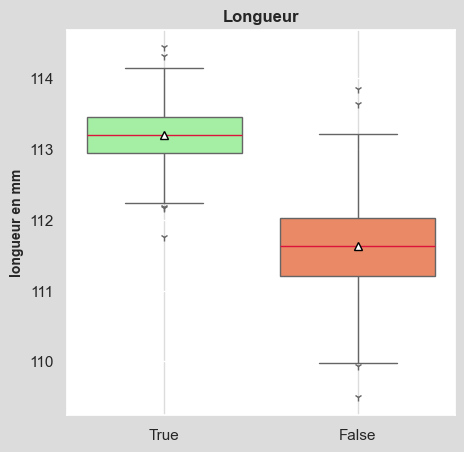

In [126]:
# analyse length with a box plot
sns.set(rc={'figure.figsize':(5, 5),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph1_long = sns.boxplot(data=billets_final, y='length', x='is_genuine', hue='is_genuine',
                     flierprops={"marker":"1"}, medianprops={"color":'crimson'},
                     meanprops={"markerfacecolor":"white", "markeredgecolor":'black'},
                     orient="v", palette=['coral', 'palegreen'], showmeans=True, dodge=False, order=[True, False])
plt.xlabel('')
plt.ylabel("longueur en mm", fontweight='bold', fontsize=10)
plt.title("Longueur", fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='x', color='gainsboro')
plt.savefig("boxplot_length.png", bbox_inches='tight')
plt.show()

Les caracteristiques des vrais et faux billets sont nettement differentes sauf pour la longueur de la diagonale, ou la difference est moins marquee. Les outliers etant relativement proches des moustaches, nous les considererons comme des valeurs atypiques (et non aberrantes) et nous les conserverons pour la suite de l'analyse.